<h2 align="center"> Univariate Linear Regression </h2>

### Task 2: Load the Data and Libraries
---

In [160]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline

In [161]:
import numpy as np
import pandas as pd  
import seaborn as sns 
plt.rcParams['figure.figsize'] = (12, 8)

In [162]:
datos = pd.read_csv("bike_sharing_data.txt")
datos.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [163]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


### Task 3: Visualize the Data
---

Text(0.5, 1.0, 'beneficiarios x Poblacion')

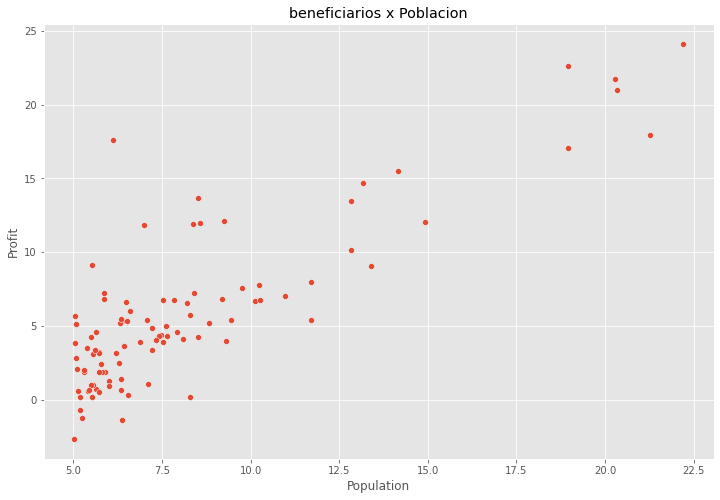

In [164]:
ax = sns.scatterplot(x="Population",y="Profit",data=datos)
ax.set_title("beneficiarios x Poblacion")

### Task 4: Compute the Cost $J(\theta)$
---

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

In [165]:
def cost_function(x,y,theta):
    m       = len (y)
    y_pred  = x.dot(theta)
    error   = (y_pred - y ) ** 2
    coste   = np.sum(error) * 1/(2*m)
    return  coste

In [166]:
# cantidad de mnuestas
# m = datos.Population.shape[0]
m =  datos.Population.values.size
m

97

In [167]:

X= np.append(np.ones((m,1)) , datos.Population.values.reshape(m,1) , axis = 1)
X[:5,:]
              

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598]])

In [168]:
y = datos.Profit.values.reshape((m,1))
y[:5,:]

array([[17.592 ],
       [ 9.1302],
       [13.662 ],
       [11.854 ],
       [ 6.8233]])

In [169]:
theta = np.zeros((2,1))
theta

array([[0.],
       [0.]])

In [170]:
cost_function(X,y,theta)

32.072733877455676

### Task 5: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

In [171]:
def gradient_descent(X,y,theta, alpha, iterations):
    m    = len(y)
    cost = []
    for i in range(iterations):
        y_pred  = X.dot(theta)
        error   = np.dot(X.transpose(),(y_pred - y))
        theta  -= alpha * 1/m * error
        cost.append(cost_function( x, y, theta))
    return theta, cost

In [172]:
theta, cost = gradient_descent(X,y,theta, alpha=0.01 , iterations=2000)

In [173]:
theta[0,0], theta[1,0]

(-3.7880685727231094, 1.1822127747573767)

In [174]:
print (f"h(x) = {round(theta[0,0],2)} + {round(theta[1,0],2)}")

h(x) = -3.79 + 1.18


### Task 6: Visualising the Cost Function $J(\theta)$
---

In [175]:
from mpl_toolkits.mplot3d import Axes3D

In [176]:
theta_0 = np.linspace(-10,10,100)
theta_1 = np.linspace(-2,4,100)

cost_values = np.zeros( (len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
    for j in range (len(theta_1)):
        t = np.array( [theta_0[i], theta_1[j]])
        cost_values[i,j] = cost_function (X,y,t)
               

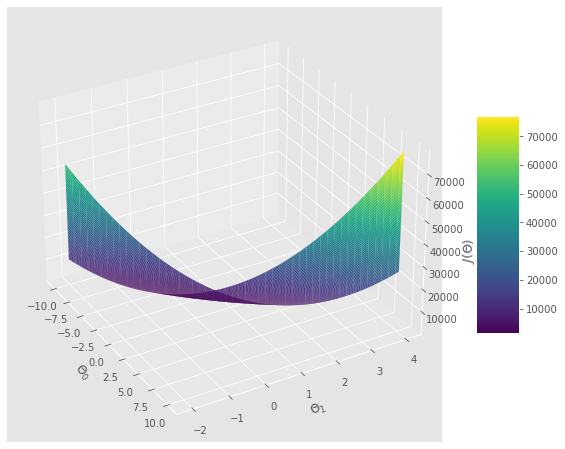

In [177]:
fig  = plt.figure(figsize=(12,8))
ax   = fig.gca(projection = "3d" )
surf = ax.plot_surface(theta_0, theta_1, cost_values,cmap="viridis")
fig.colorbar(surf, shrink=0.5, aspect= 5)

plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
ax.view_init(30,330)
plt.show()

### Task 7: Plotting the Convergence
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

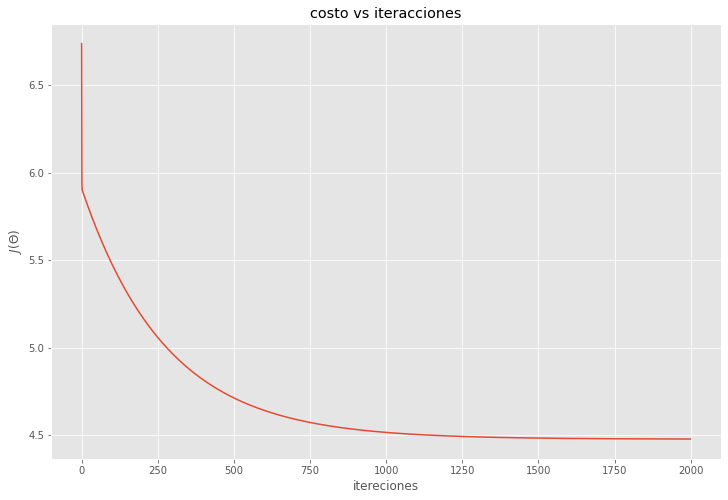

In [178]:
plt.plot(cost)
plt.xlabel("itereciones")
plt.ylabel("$J(\Theta)$")
plt.title("costo vs iteracciones")
plt.show()

### Task 8: Training Data with Linear Regression Fit
---

In [179]:
theta.shape

(2, 1)

In [180]:
theta

array([[-3.78806857],
       [ 1.18221277]])

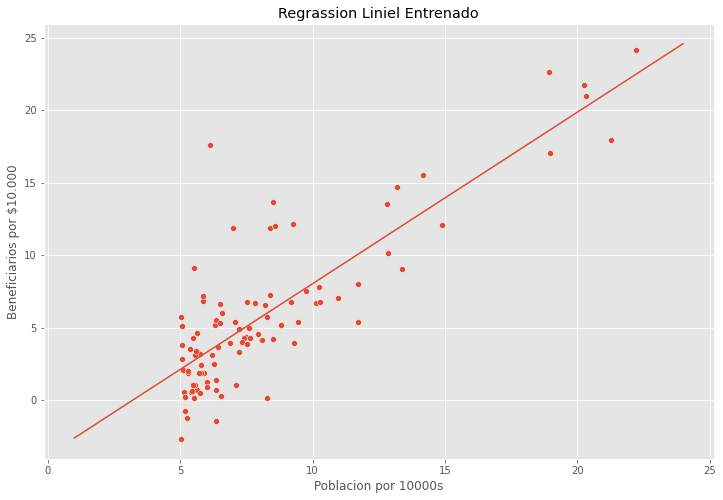

In [181]:
theta = np.squeeze(theta)
sns.scatterplot(x="Population",y="Profit", data=datos)
x_value = [ x for x in range (1, 25)]
y_value = [ x * theta[1] + theta[0] for x in x_value]
sns.lineplot(x=x_value,y=y_value)

plt.xlabel("Poblacion por 10000s")
plt.ylabel("Beneficiarios por $10.000")
plt.title("Regrassion Liniel Entrenado")
plt.show()

### Task 9: Inference using the optimized $\theta$ values
---

$h_\theta(x) = \theta^Tx$

In [184]:
def predict(x,theta):
    y_pred = np.dot(theta.T, x)
    return y_pred

In [186]:
y_pred_1 = predict( np.array([1,4]), theta= theta )* 10000
print("Para una poblacion de 40000 personas, el modelo predice un beneficio de ${}".format(round(y_pred_1,0)))

Para una poblacion de 40000 personas, el modelo predice un beneficio de $9408.0


In [188]:
y_pred_1 = predict( np.array([1,8.3]), theta= theta )* 10000
print("Para una poblacion de 830000 personas, el modelo predice un beneficio de ${}".format(round(y_pred_1,0)))

Para una poblacion de 830000 personas, el modelo predice un beneficio de $60243.0


In [189]:
y_pred_1 = predict( np.array([1,20]), theta= theta )* 10000
print("Para una poblacion de 200000 personas, el modelo predice un beneficio de ${}".format(round(y_pred_1,0)))

Para una poblacion de 200000 personas, el modelo predice un beneficio de $198562.0
